In [1]:
import sys
import pathlib
import pandas as pd
import numpy as np
import boto3
import time

ROOT = pathlib.Path().absolute().parent.as_posix()
if ROOT not in sys.path:
    sys.path.append(ROOT)
    
from helpers import *

In [2]:
df = fill_penultimate_df()

df.to_csv(ROOT_FOLDER_PATH + '/final_df.csv', index = True)
upload_df_to_s3(bucket = '', df = df, key = '')

popd_weight =  1.3304790199790024
apply_greenspace_score_function complete
Time taken: 3.45
Successful upload


In [3]:
print(df.columns)

Index(['Latitude', 'Longitude', 'Airport', 'Water', 'Building', 'Green_Space',
       'Railway_Station', 'Urban_Area', 'Distance_Nearest_Greenspace',
       'Value_co', 'Value_no2', 'Value_o3', 'Value_so2', 'Value_ai',
       'AQ_score', 'Pop_density', 'Greenspace_score', 'penalty_reward'],
      dtype='object')


In [4]:
df

,Latitude,Longitude,Airport,Water,Building,Green_Space,Railway_Station,Urban_Area,Distance_Nearest_Greenspace,Value_co,Value_no2,Value_o3,Value_so2,Value_ai,AQ_score,Pop_density,Greenspace_score,penalty_reward
0,51.737184,-0.620643,0,0,0,1,0,0,0.250028,0.764264,0.004088,7.248996,0.032141,-1.031149,0.360777,1.445061,0.100284,0.500
1,51.737184,-0.617012,0,0,0,0,0,0,0.282991,0.764304,0.004140,7.250456,0.032148,-1.035486,0.361721,1.445061,0.257828,1.250
2,51.737184,-0.613382,0,0,1,1,0,0,0.202730,0.764350,0.004143,7.250998,0.032186,-1.037714,0.361822,1.445061,0.072525,0.375
3,51.737183,-0.609751,0,0,1,1,0,0,0.166666,0.764624,0.004142,7.251659,0.032087,-1.035978,0.362065,3.517970,0.102988,0.375
4,51.737183,-0.606120,0,0,0,1,0,0,0.166666,0.764288,0.004142,7.252279,0.031958,-1.039697,0.361140,3.517970,0.137137,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58243,51.238843,0.312049,0,0,0,1,0,0,0.166663,0.764161,0.002717,7.310894,0.028964,-0.748909,0.355456,0.916133,0.075727,0.500
58244,51.238815,0.315640,0,0,0,1,0,0,0.166663,0.764524,0.002728,7.310550,0.029058,-0.745427,0.356564,0.916133,0.075943,0.500
58245,51.238786,0.319231,0,1,1,1,0,0,0.166662,0.764969,0.002732,7.310113,0.029139,-0.744029,0.357403,0.916133,0.000000,0.000
58246,51.238757,0.322822,0,1,1,0,0,0,0.249996,0.765131,0.002735,7.311109,0.029128,-0.740657,0.358034,0.916133,0.000000,0.000


In [5]:
df['Greenspace_score'].describe()

count    58248.000000
mean         0.092011
std          0.086457
min          0.000000
25%          0.051981
50%          0.078221
75%          0.102282
max          1.211044
Name: Greenspace_score, dtype: float64

In [6]:
df['AQ_score'].describe()

count    58248.000000
mean         0.381069
std          0.032828
min          0.221994
25%          0.356565
50%          0.374261
75%          0.403724
max          0.652611
Name: AQ_score, dtype: float64

In [7]:
df['penalty_reward'].describe()

count    58248.000000
mean         0.476344
std          0.377443
min          0.000000
25%          0.375000
50%          0.468750
75%          0.500000
max          1.562500
Name: penalty_reward, dtype: float64

In [13]:
df[df['penalty_reward'] == 0]

,Latitude,Longitude,Airport,Water,Building,Green_Space,Railway_Station,Urban_Area,Distance_Nearest_Greenspace,Value_co,Value_no2,Value_o3,Value_so2,Value_ai,AQ_score,Pop_density,Greenspace_score,penalty_reward
42,51.737085,-0.468159,0,1,1,0,0,1,0.250023,0.768606,0.004029,7.176766,0.029069,-1.024921,0.348030,1.251587,0.0,0.0
43,51.737080,-0.464528,0,1,1,1,0,1,0.166690,0.771693,0.004017,7.185701,0.029010,-1.019098,0.352705,1.149233,0.0,0.0
80,51.736826,-0.330199,0,1,1,1,0,1,0.166666,0.758640,0.004088,7.225034,0.027659,-0.858110,0.353917,3.654974,0.0,0.0
81,51.736817,-0.326568,0,1,1,1,0,1,0.166666,0.758034,0.004067,7.230376,0.027860,-0.883796,0.351920,3.654974,0.0,0.0
96,51.736668,-0.272111,0,1,0,1,0,0,0.166666,0.766107,0.004522,7.162347,0.027336,-0.977889,0.352691,3.367509,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58226,51.239313,0.251005,0,1,0,1,0,0,0.166665,0.765010,0.002768,7.281357,0.025880,-0.799781,0.341739,1.160173,0.0,0.0
58228,51.239260,0.258187,0,1,1,1,0,0,0.166665,0.764756,0.002759,7.285538,0.026257,-0.792329,0.343365,1.160173,0.0,0.0
58240,51.238929,0.301277,0,1,1,1,0,0,0.166663,0.763003,0.002704,7.314267,0.028764,-0.759520,0.352954,0.916133,0.0,0.0
58245,51.238786,0.319231,0,1,1,1,0,0,0.166662,0.764969,0.002732,7.310113,0.029139,-0.744029,0.357403,0.916133,0.0,0.0


In [8]:
df['Distance_Nearest_Greenspace'].describe()

count    58248.000000
mean         0.199523
std          0.080860
min          0.166658
25%          0.166666
50%          0.166666
75%          0.166691
max          1.390527
Name: Distance_Nearest_Greenspace, dtype: float64

In [9]:
df2 = df.sort_values('Greenspace_score', ascending = False)
df2 = df2.drop(['Value_co', 'Value_no2', 'Value_o3', 'Value_so2', 'Value_ai'], axis = 1)
df2

,Latitude,Longitude,Airport,Water,Building,Green_Space,Railway_Station,Urban_Area,Distance_Nearest_Greenspace,AQ_score,Pop_density,Greenspace_score,penalty_reward
7134,51.676279,-0.400550,0,0,1,0,0,1,0.319046,0.353159,18.846376,1.211044,1.171875
38828,51.405356,-0.062627,0,0,1,0,0,1,0.283005,0.372728,138.174805,1.187803,1.171875
7152,51.676140,-0.335288,0,0,0,0,0,1,0.471137,0.362512,10.434493,1.112993,1.562500
25867,51.516024,-0.177874,0,0,1,0,0,1,0.452742,0.434358,353.029144,1.004361,1.171875
3674,51.705706,-0.597550,0,0,0,0,0,1,0.286117,0.357114,10.605771,0.981758,1.562500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9118,51.658398,0.118304,0,1,1,0,0,0,0.470433,0.372961,0.773601,0.000000,0.000000
9120,51.658352,0.125552,0,1,0,0,0,0,0.449645,0.368206,3.629048,0.000000,0.000000
9121,51.658329,0.129176,0,1,0,0,0,0,0.319019,0.360995,0.341370,0.000000,0.000000
9122,51.658305,0.132801,0,1,0,1,0,0,0.166669,0.365295,0.688383,0.000000,0.000000


In [10]:
len(df2)

58248

In [11]:
df2[df2['Greenspace_score'] > 100]

,Latitude,Longitude,Airport,Water,Building,Green_Space,Railway_Station,Urban_Area,Distance_Nearest_Greenspace,AQ_score,Pop_density,Greenspace_score,penalty_reward


IndexError: index 0 is out of bounds for axis 0 with size 0

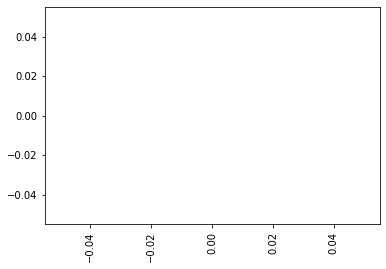

In [12]:
df2[df2['Greenspace_score'] > 10]['Greenspace_score'].plot(kind = 'bar')